In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:

dfaustincal = pd.read_csv('/content/gdrive/MyDrive/AUSTIN/calendar.csv')
dfaustincal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5456,2022-06-09,f,$95.00,$95.00,2.0,90.0
1,5456,2022-06-10,f,$150.00,$150.00,2.0,90.0
2,5456,2022-06-11,f,$150.00,$150.00,2.0,90.0
3,5456,2022-06-12,f,$95.00,$95.00,2.0,90.0
4,5456,2022-06-13,f,$95.00,$95.00,2.0,90.0


In [ ]:
#listings dataframe
dfauslistings = pd.read_csv('/content/gdrive/MyDrive/AUSTIN/listings.csv')
dfauslistings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20220608163127,2022-06-09,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,...,4.81,4.74,4.79,NaN,f,1,1,0,0,3.72
1,5769,https://www.airbnb.com/rooms/5769,20220608163127,2022-06-08,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,...,4.94,4.74,4.92,NaN,f,1,0,1,0,1.78
2,6413,https://www.airbnb.com/rooms/6413,20220608163127,2022-06-09,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,https://www.airbnb.com/users/show/13879,...,4.98,4.86,4.94,NaN,f,1,1,0,0,0.78
3,6448,https://www.airbnb.com/rooms/6448,20220608163127,2022-06-09,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,14156,https://www.airbnb.com/users/show/14156,...,4.97,4.97,4.90,NaN,t,1,1,0,0,2.12
4,341382,https://www.airbnb.com/rooms/341382,20220608163127,2022-06-09,SXSW | 4 bedroom home near Downtown,"The house is comfortable, homey, and so full o...","We are located in laid-back, fun East Austin, ...",https://a0.muscache.com/pictures/fa98c11d-15e8...,1205884,https://www.airbnb.com/users/show/1205884,...,4.88,4.39,4.53,NaN,f,1,1,0,0,0.99


In [ ]:
# reviews dataframe
dfausreviews = pd.read_csv('/content/gdrive/MyDrive/AUSTIN/reviews-2.csv')
dfausreviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,5456,865,2009-03-08,5267,Ellen,Sylvia is a hostess who is gracious and helpfu...
1,5456,977,2009-03-19,8102,Phil,Highly recommended. Sylvia was extremely helpf...
2,5456,1039,2009-03-22,8241,Galen,A great place to stay in a great city. Sylvia ...
3,5456,1347,2009-04-08,11152,April,Highly recommended! \r<br/>Cute and cozy guest...
4,5456,1491,2009-04-13,12400,Ivonne,"What a great little apartment! It was clean, ..."


In [ ]:

print("rows and columns of dataset", dfaustincal.shape)
print(dfaustincal.isnull().sum())
print(dfaustincal.describe(include='all'))




rows and columns of dataset (6229497, 7)
listing_id           0
date                 0
available            0
price              566
adjusted_price     566
minimum_nights    2134
maximum_nights    2134
dtype: int64
          listing_id        date available    price adjusted_price  \
count   6.229497e+06     6229497   6229497  6228931        6228931   
unique           NaN         366         2     4666           4678   
top              NaN  2023-05-30         f  $150.00        $150.00   
freq             NaN       17070   3363711   146732         143434   
mean    1.046985e+17         NaN       NaN      NaN            NaN   
std     2.264724e+17         NaN       NaN      NaN            NaN   
min     5.456000e+03         NaN       NaN      NaN            NaN   
25%     2.294327e+07         NaN       NaN      NaN            NaN   
50%     4.363939e+07         NaN       NaN      NaN            NaN   
75%     5.275607e+07         NaN       NaN      NaN            NaN   
max     6.44193

In [ ]:

print("rows and columns of dataset ", dfauslistings.shape)
print(dfauslistings.isnull().sum())
print(dfauslistings.describe(include='all'))
dfauslistings

rows and columns of dataset  (17071, 74)
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3292
Length: 74, dtype: int64
                  id                        listing_url     scrape_id  \
count   1.707100e+04                              17071  1.707100e+04   
unique           NaN                              17071           NaN   
top              NaN  https://www.airbnb.com/rooms/5456           NaN   
freq             NaN                                  1    

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20220608163127,2022-06-09,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,...,4.81,4.74,4.79,NaN,f,1,1,0,0,3.72
1,5769,https://www.airbnb.com/rooms/5769,20220608163127,2022-06-08,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,...,4.94,4.74,4.92,NaN,f,1,0,1,0,1.78
2,6413,https://www.airbnb.com/rooms/6413,20220608163127,2022-06-09,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,https://www.airbnb.com/users/show/13879,...,4.98,4.86,4.94,NaN,f,1,1,0,0,0.78
3,6448,https://www.airbnb.com/rooms/6448,20220608163127,2022-06-09,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,14156,https://www.airbnb.com/users/show/14156,...,4.97,4.97,4.90,NaN,t,1,1,0,0,2.12
4,341382,https://www.airbnb.com/rooms/341382,20220608163127,2022-06-09,SXSW | 4 bedroom home near Downtown,"The house is comfortable, homey, and so full o...","We are located in laid-back, fun East Austin, ...",https://a0.muscache.com/pictures/fa98c11d-15e8...,1205884,https://www.airbnb.com/users/show/1205884,...,4.88,4.39,4.53,NaN,f,1,1,0,0,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17066,539731600041129313,https://www.airbnb.com/rooms/539731600041129313,20220608163127,2022-06-08,Centrally located home in cozy neighborhood,Pie Capitol of Texas & best kept secret of the...,Quiet neighborhood with community park nearby,https://a0.muscache.com/pictures/c1677cc2-7348...,439978004,https://www.airbnb.com/users/show/439978004,...,4.85,4.77,4.62,NaN,t,1,1,0,0,3.10
17067,586910439366221002,https://www.airbnb.com/rooms/586910439366221002,20220608163127,2022-06-08,Cheerful Country Ranch property with four bedr...,Forget your worries in this spacious and seren...,NaN,https://a0.muscache.com/pictures/b128457d-c69a...,256520767,https://www.airbnb.com/users/show/256520767,...,4.95,5.00,5.00,NaN,f,1,1,0,0,7.92
17068,602333588642466890,https://www.airbnb.com/rooms/602333588642466890,20220608163127,2022-06-08,Cozy Master bedroom North Austin,Cozy master bedroom with private bathroom in ...,NaN,https://a0.muscache.com/pictures/a0af7ee8-100e...,84104364,https://www.airbnb.com/users/show/84104364,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
17069,41819463,https://www.airbnb.com/rooms/41819463,20220608163127,2022-06-08,Happy House at Blanco Rapids Ranch,We are close to Wimberley and Canyon Lake on t...,This ranch is in the former Boy Scout Ranch on...,https://a0.muscache.com/pictures/a1c7a6d2-fa4a...,79504097,https://www.airbnb.com/users/show/79504097,...,4.97,4.98,4.87,NaN,t,5,5,0,0,4.39


In [ ]:
print("rows and columns of dataset ", dfausreviews.shape)
print(dfausreviews.isnull().sum())
print(dfausreviews.describe(include='all'))

rows and columns of dataset  (605983, 6)
listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         151
dtype: int64
          listing_id            id        date   reviewer_id reviewer_name  \
count   6.059830e+05  6.059830e+05      605983  6.059830e+05        605983   
unique           NaN           NaN        4075           NaN         49056   
top              NaN           NaN  2022-05-22           NaN       Michael   
freq             NaN           NaN        2502           NaN          5589   
mean    1.035127e+16  1.715419e+17         NaN  1.358808e+08           NaN   
std     7.637695e+16  2.501904e+17         NaN  1.233876e+08           NaN   
min     5.456000e+03  8.650000e+02         NaN  3.000000e+00           NaN   
25%     1.052478e+07  3.451884e+08         NaN  3.338072e+07           NaN   
50%     2.280722e+07  6.390871e+08         NaN  9.593750e+07           NaN   
75%     3.902932e+07  4.550137e+17      

Text(0.5, 1.0, 'Host Response Time')

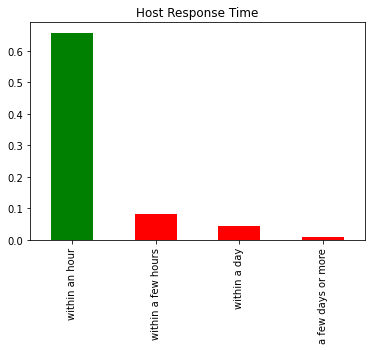

In [ ]:

hostresp=dfauslistings['host_response_time'].value_counts()

(hostresp/dfauslistings.shape[0]).plot(kind="bar", color=['green', 'red', 'red', 'red'])

plt.title("Host Response Time")

Text(0.5, 1.0, 'Property Type')

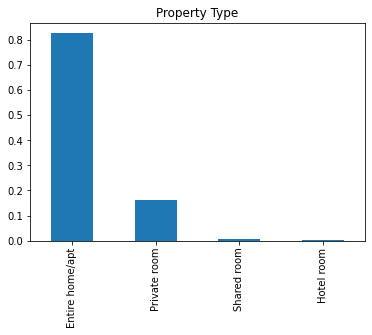

In [ ]:
propertytype = dfauslistings['room_type'].value_counts()
(propertytype/dfauslistings.shape[0]).plot(kind="bar")
plt.title("Property Type")

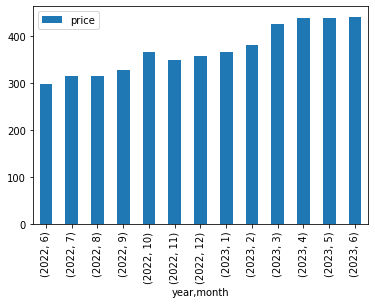

In [ ]:

dfaustincal['year'] = pd.DatetimeIndex(dfaustincal['date']).year
dfaustincal['month'] = pd.DatetimeIndex(dfaustincal['date']).month

# float and removing $
dfaustincal['price'] = dfaustincal['price'].replace('[\$,]', '', regex=True).astype(float)

dfaustincal.groupby(['year','month'])[['price']].mean().plot(kind="bar")






In [ ]:
ziparea= pd.read_csv('/content/gdrive/MyDrive/AUSTIN/csvData.csv')
ziparea

,zip,city,county,pop
0,77449,Katy,Harris,128294
1,77494,Katy,Fort Bend,118291
2,79936,El Paso,El Paso,111620
3,75034,Frisco,Collin,108525
4,77084,Houston,Harris,107673
...,...,...,...,...
1925,79051,Kerrick,Dallam,0
1926,79058,Masterson,Moore,0
1927,79105,Amarillo,Potter,0
1928,79759,Notrees,Ector,0


                                       price
neighbourhood                               
Cypress Mill, Texas, United States    2857.0
Burnet County, Texas, United States   1022.0
Rollingwood, Texas, United States      995.0
Lake Travis, Texas, United States      915.0
Spicewood , Texas, United States       850.0
...                                      ...
Lott TX, Texas, United States           85.0
Seguin, Texas, United States            77.0
Bastrop County, Texas, United States    75.0
Andice, Texas, United States            62.5
Webberville, Texas, United States       50.0

[98 rows x 1 columns]
Austin, Texas, United States               7169
Wimberley, Texas, United States             270
Dripping Springs, Texas, United States      221
Round Rock, Texas, United States            187
Lago Vista, Texas, United States            180
                                           ... 
Cypress Mill, Texas, United States            1
point venture, Texas, United States           1
Canyon L

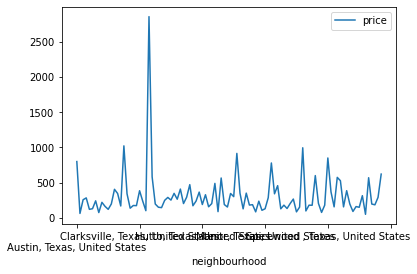

In [ ]:
dfauslistings['price'] = dfauslistings['price'].replace('[\$,]', '', regex=True).astype(float)

print(dfauslistings.groupby(['neighbourhood'])[['price']].mean().sort_values(by='price',ascending=False))
dfauslistings.groupby(['neighbourhood'])[['price']].mean().plot()
print(dfauslistings.neighbourhood.value_counts())

In [ ]:
# average price by neighborhood


dfauslistings['price'] = dfauslistings['price'].replace('[\$,]', '', regex=True).astype(float)

y=dfauslistings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False)
y.rename(columns = {'neighbourhood_cleansed':'zip'}, inplace = True)




                                      price
neighbourhood                              
Cypress Mill, Texas, United States   2857.0
Burnet County, Texas, United States  1022.0
Rollingwood, Texas, United States     995.0
Lake Travis, Texas, United States     915.0
Spicewood , Texas, United States      850.0


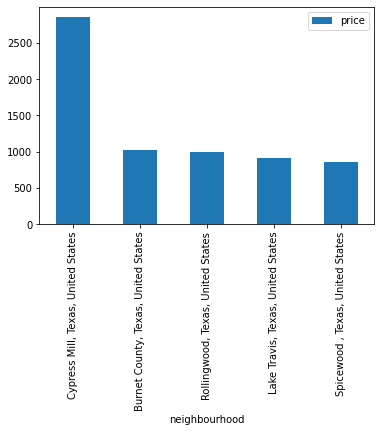

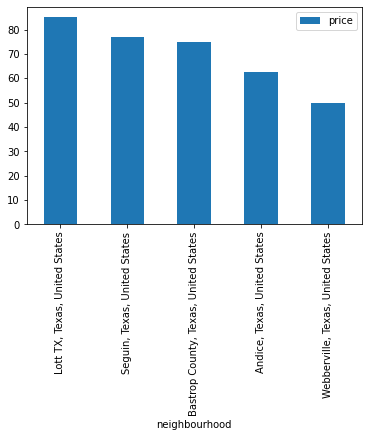

In [ ]:


toplocal3=dfauslistings.groupby(['neighbourhood'])[['price']].mean().sort_values(by='price',ascending=False).head()
print(toplocal3)
toplocal3.plot(kind='bar')

taillocal=dfauslistings.groupby(['neighbourhood'])[['price']].mean().sort_values(by='price',ascending=False).tail()
taillocal.plot(kind='bar');

In [ ]:
neigh = ('Cypress Mill, Texas, United States','Burnet County, Texas, United States','Rollingwood, Texas, United States','Lake Travis, Texas, United States','Spicewood , Texas, United States')
prop = ('Entire home/apt','Private room')
df_1 = dfauslistings.loc[dfauslistings['neighbourhood'].isin(neigh)]
df_2 = df_1.loc[dfauslistings['room_type'].isin(prop)]

df_prop = df_2.groupby(['neighbourhood','room_type'])[['price']].mean().reset_index()
df_prop





,neighbourhood,room_type,price
0,"Burnet County, Texas, United States",Entire home/apt,1022.0
1,"Cypress Mill, Texas, United States",Entire home/apt,2857.0
2,"Lake Travis, Texas, United States",Entire home/apt,915.0
3,"Rollingwood, Texas, United States",Private room,995.0
4,"Spicewood , Texas, United States",Entire home/apt,850.0


In [ ]:
comments = dfausreviews[['listing_id', 'comments']]
print(comments.head())



   listing_id                                           comments
0        5456  Sylvia is a hostess who is gracious and helpfu...
1        5456  Highly recommended. Sylvia was extremely helpf...
2        5456  A great place to stay in a great city. Sylvia ...
3        5456  Highly recommended! \r<br/>Cute and cozy guest...
4        5456  What a great little apartment!  It was clean, ...


In [ ]:

def get_neigh(listing_id):
    
    neighbourhood = dfauslistings.loc[dfauslistings['id'] == listing_id, 'neighbourhood']
    return neighbourhood

# Test function
get_neigh(21126)


12    Austin, Texas, United States
Name: neighbourhood, dtype: object

In [ ]:
y=comments.merge(dfauslistings,left_on='listing_id',right_on='id')


In [ ]:
y

y=y[['listing_id','comments','neighbourhood']]

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
   
    sentence = str(sentence)
    score = analyser.polarity_scores(sentence)
    return score['compound']


y['polarity_score'] = y['comments'].apply(sentiment_analyzer_scores)
y.head(20)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,listing_id,comments,neighbourhood,polarity_score
0,5456,Sylvia is a hostess who is gracious and helpfu...,"Austin, Texas, United States",0.9589
1,5456,Highly recommended. Sylvia was extremely helpf...,"Austin, Texas, United States",0.8432
2,5456,A great place to stay in a great city. Sylvia ...,"Austin, Texas, United States",0.9705
3,5456,Highly recommended! \r<br/>Cute and cozy guest...,"Austin, Texas, United States",0.5042
4,5456,"What a great little apartment! It was clean, ...","Austin, Texas, United States",0.9787
5,5456,"Sylvia was great; ""ditto"" to all the previous ...","Austin, Texas, United States",0.9468
6,5456,Sylvia and her cute apartment we absolutely wo...,"Austin, Texas, United States",0.9824
7,5456,Sylvia is the best! Her guest house was charmi...,"Austin, Texas, United States",0.9831
8,5456,Sylvia is great person and great host. She pic...,"Austin, Texas, United States",0.9359
9,5456,She's a special woman and our stay was wonderf...,"Austin, Texas, United States",0.8625


In [ ]:
y.tail(20)



,listing_id,comments,neighbourhood,polarity_score
0,5456,Sylvia is a hostess who is gracious and helpfu...,"Austin, Texas, United States",0.9589
1,5456,Highly recommended. Sylvia was extremely helpf...,"Austin, Texas, United States",0.8432
2,5456,A great place to stay in a great city. Sylvia ...,"Austin, Texas, United States",0.9705
3,5456,Highly recommended! \r<br/>Cute and cozy guest...,"Austin, Texas, United States",0.5042
4,5456,"What a great little apartment! It was clean, ...","Austin, Texas, United States",0.9787
...,...,...,...,...
605978,45328467,Delightful stay at an adorable little house! M...,"Hutto, Texas, United States",0.8975
605979,45328467,Our stay on the farm exceeded our expectations...,"Hutto, Texas, United States",0.9948
605980,45328467,Wonderful stay!,"Hutto, Texas, United States",0.6114
605981,45328467,This tiny home and the Host Michelle was aweso...,"Hutto, Texas, United States",0.8966


In [ ]:
y=y.dropna()
y

,listing_id,comments,neighbourhood,polarity_score
0,5456,Sylvia is a hostess who is gracious and helpfu...,"Austin, Texas, United States",0.9589
1,5456,Highly recommended. Sylvia was extremely helpf...,"Austin, Texas, United States",0.8432
2,5456,A great place to stay in a great city. Sylvia ...,"Austin, Texas, United States",0.9705
3,5456,Highly recommended! \r<br/>Cute and cozy guest...,"Austin, Texas, United States",0.5042
4,5456,"What a great little apartment! It was clean, ...","Austin, Texas, United States",0.9787
...,...,...,...,...
605978,45328467,Delightful stay at an adorable little house! M...,"Hutto, Texas, United States",0.8975
605979,45328467,Our stay on the farm exceeded our expectations...,"Hutto, Texas, United States",0.9948
605980,45328467,Wonderful stay!,"Hutto, Texas, United States",0.6114
605981,45328467,This tiny home and the Host Michelle was aweso...,"Hutto, Texas, United States",0.8966


In [ ]:

print('Positive scores: ',y['polarity_score'][y['polarity_score'] > 0].count())
print('Negative  scores: ',y['polarity_score'][y['polarity_score'] < 0].count())
print('Neutral  scores: ',y['polarity_score'][y['polarity_score'] == 0].count())

Positive scores:  487672
Negative  scores:  4983
Neutral  scores:  8342


In [ ]:
neigh_polarity = y.groupby('neighbourhood')[['polarity_score']].mean().sort_values(by='polarity_score',ascending=False)

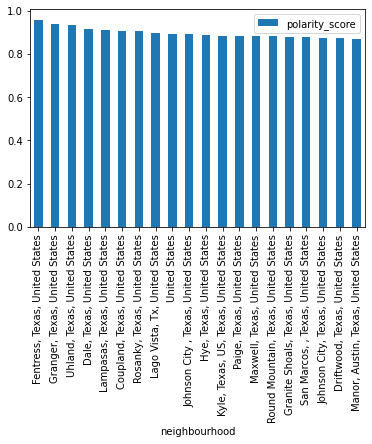

In [ ]:
neigh_polarity.head(20).plot(kind='bar');


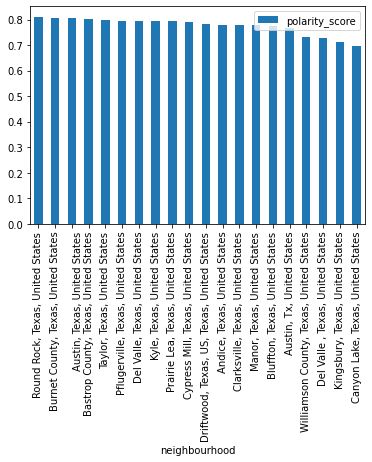

In [ ]:
neigh_polarity.tail(20).plot(kind='bar');

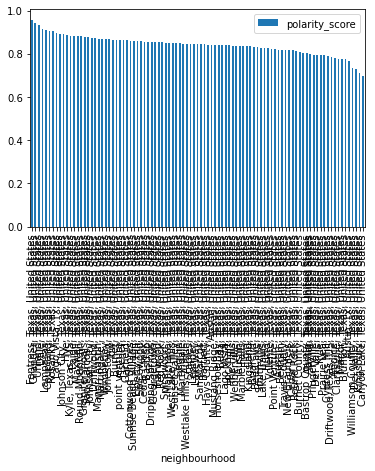

In [ ]:
neigh_polarity.plot(kind='bar');

In [ ]:
y.sort_values(by='polarity_score',ascending=True).tail(10)

,listing_id,comments,neighbourhood,polarity_score
579104,658762,The Cypress Creek Cabin is really what almost ...,"Round Mountain, Texas, United States",0.9995
374619,45939066,Highly recommend for many reasons! We came to ...,"Austin, Texas, United States",0.9995
9275,69303,"We loved Lois' fun, comfortable place so much....","Austin, Texas, United States",0.9995
527619,23669539,AMAZING!!!!!!!! Everything was so incredible t...,"Wimberley, Texas, United States",0.9995
577834,43076532,If you’re not a detailed person and just want ...,"Georgetown, Texas, United States",0.9995
575348,20649249,"Let's just say, this home and yard is phenomen...","Spicewood, Texas, United States",0.9995
554561,330034,We returned from Alicia's last night and I hav...,"Manchaca, Texas, United States",0.9996
161841,16588135,My husband and I very much enjoyed our 6 night...,"Austin, Texas, United States",0.9996
338833,39029322,"Having never been to Austin, we knew that Sout...","Austin, Texas, United States",0.9996
563589,573160934848026727,I've been staying at Airbnbs for about a decad...,"Round Rock, Texas, United States",0.9996


In [ ]:
y.sort_values(by='polarity_score',ascending=False).tail(30)

,listing_id,comments,neighbourhood,polarity_score
467964,23545024,"On the plus side, the neighborhood was very ni...","Round Rock, Texas, United States",-0.9839
383691,47953525,We incurred a few problems during our stay th...,"Austin, Texas, United States",-0.9843
310587,35323273,It pains me to leave a negative review. Raj se...,"Austin, Texas, United States",-0.9845
315979,34807046,The Airbnb is beautiful and in a wonderful loc...,"Austin, Texas, United States",-0.9848
34258,300574,"If you think crumbling sheetrock, questionable...","Austin, Texas, United States",-0.9848
167826,15826995,We initially based our stay upon the condition...,"Austin, Texas, United States",-0.9848
319106,36700041,This was my first and last experience with Air...,"Austin, Texas, United States",-0.9850
331094,37991217,"Very disappointed with service given to me, Wi...","Austin, Texas, United States",-0.9853
596592,43717726,Upon arrival the house reeked of cat litter an...,"Leander, Texas, United States",-0.9853
300402,31804158,Great place to stay if you want your host or t...,"Austin, Texas, United States",-0.9855


In [ ]:
a=y.groupby('listing_id')
a